<a href="https://colab.research.google.com/github/Fragoa/Transfer-Learning-Fine-Tuning-with-ImageNet/blob/main/simulation10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50
import matplotlib.pyplot as plt
import numpy as np

# Phase 1: Setup & Model Selection

In [4]:
# Load models with pre-trained ImageNet weights
vgg16_model = VGG16(weights='imagenet')
resnet50_model = ResNet50(weights='imagenet')

# Print the detailed architecture summaries
print("--- VGG16 Model Summary ---")
vgg16_model.summary()

print("\n--- ResNet50 Model Summary ---")
resnet50_model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step
102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
--- VGG16 Model Summary ---


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)


--- ResNet50 Model Summary ---


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

# Phase 2: Data Preparation

In [5]:
# 1. Load standard MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
# 2. Define the preprocessing function
def preprocess_for_imagenet(images):
    """
    Normalizes, converts to RGB, and resizes MNIST images.
    """
    # Add a channel dimension for grayscale
    images = tf.expand_dims(images, axis=-1)

    # Normalize pixel values to [0, 1]
    images = tf.cast(images, tf.float32) / 255.0

    # Convert grayscale to RGB (3 channels)
    images_rgb = tf.image.grayscale_to_rgb(images)

    # Resize to ImageNet's standard input size (224x224)
    images_resized = tf.image.resize(images_rgb, [224, 224])

    return images_resized

In [7]:
# 3. Preprocess the training data
# Note: We only process a small batch for visualization to save time.
# In a real scenario, you would use a tf.data.Dataset pipeline.
x_train_processed = preprocess_for_imagenet(x_train[:9])
y_train_sample = y_train[:9]

Shape of preprocessed images: (9, 224, 224, 3)
Data type: <dtype: 'float32'>


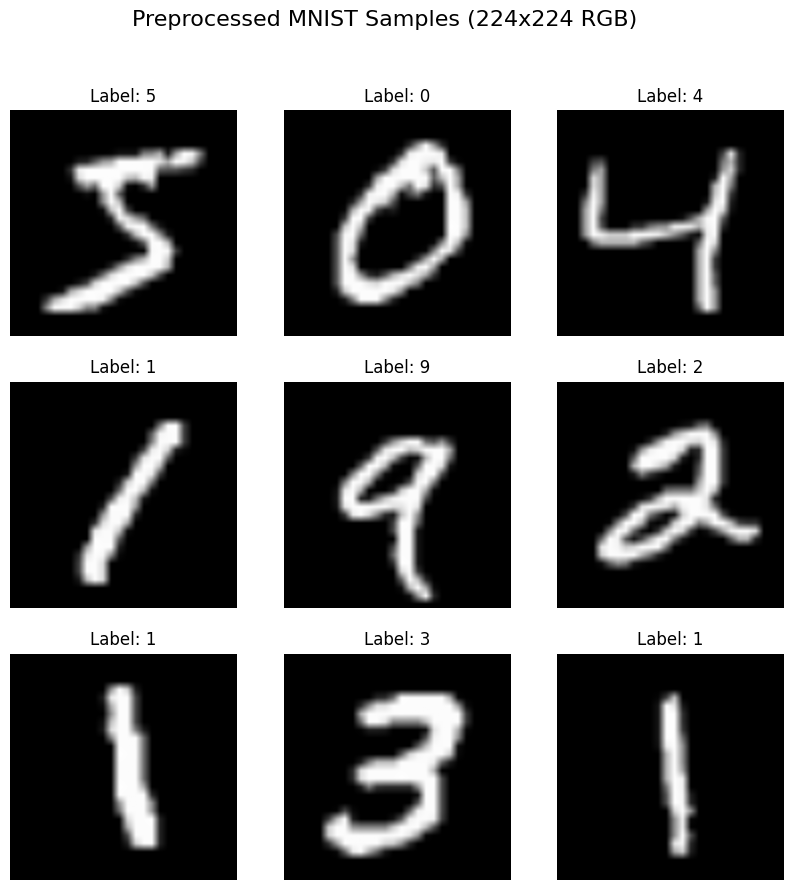

In [8]:
# 4. Output: Visualize preprocessed samples
print("Shape of preprocessed images:", x_train_processed.shape)
print("Data type:", x_train_processed.dtype)

plt.figure(figsize=(10, 10))
plt.suptitle("Preprocessed MNIST Samples (224x224 RGB)", fontsize=16)
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train_processed[i])
    plt.title(f"Label: {y_train_sample[i]}")
    plt.axis("off")
plt.show()

# Phase 3: Transfer Learning Implementation  

In [9]:
def preprocess_for_imagenet(images):
    images = tf.expand_dims(images, axis=-1)
    images = tf.cast(images, tf.float32) / 255.0
    images_rgb = tf.image.grayscale_to_rgb(images)
    images_resized = tf.image.resize(images_rgb, [48, 48]) # Use 48x48 for faster training
    return images_resized

In [12]:
# Create TensorFlow Datasets for efficient training
BATCH_SIZE = 128
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.map(
    lambda x, y: (preprocess_for_imagenet(x), y),
    num_parallel_calls=tf.data.AUTOTUNE
).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.map(
    lambda x, y: (preprocess_for_imagenet(x), y),
    num_parallel_calls=tf.data.AUTOTUNE
).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [10]:
def build_and_train_model(base_model_class, name, ft_epochs=5, fine_tune_epochs=5):
    """Builds, trains, and fine-tunes a model, returning its accuracy and history."""
    print(f"\n{'='*20} Processing Model: {name} {'='*20}")

    base_model = base_model_class(input_shape=(48, 48, 3), include_top=False, weights='imagenet')
    base_model.trainable = False
    inputs = tf.keras.Input(shape=(48, 48, 3))
    x = base_model(inputs, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)

    # --- Task 1: Feature Extraction ---
    print(f"\n--- [Task 1] Starting Feature Extraction for {name} ---")
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history_ft = model.fit(train_dataset, epochs=ft_epochs, validation_data=test_dataset, verbose=1)
    _, acc_ft = model.evaluate(test_dataset)

    # --- Task 2: Fine-Tuning ---
    print(f"\n--- [Task 2] Starting Fine-Tuning for {name} ---")
    base_model.trainable = True
    if name == 'VGG16':
        for layer in base_model.layers[:-4]: layer.trainable = False
    elif name == 'ResNet50':
        for layer in base_model.layers[:-15]: layer.trainable = False

    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-5),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history_fine_tune = model.fit(train_dataset, initial_epoch=history_ft.epoch[-1] + 1, epochs=ft_epochs + fine_tune_epochs, validation_data=test_dataset, verbose=1)
    _, acc_fine_tune = model.evaluate(test_dataset)

    return acc_ft, acc_fine_tune, history_ft, history_fine_tune

In [13]:
# -------------------------------------
## 3. RUN EXPERIMENTS FOR BOTH MODELS
# -------------------------------------
FT_EPOCHS = 5
FINE_TUNE_EPOCHS = 5

acc_ft_vgg, acc_fine_tune_vgg, history_ft_vgg, history_fine_tune_vgg = build_and_train_model(
    tf.keras.applications.VGG16, name="VGG16", ft_epochs=FT_EPOCHS, fine_tune_epochs=FINE_TUNE_EPOCHS)

acc_ft_resnet, acc_fine_tune_resnet, history_ft_resnet, history_fine_tune_resnet = build_and_train_model(
    tf.keras.applications.ResNet50, name="ResNet50", ft_epochs=FT_EPOCHS, fine_tune_epochs=FINE_TUNE_EPOCHS)



==================== Processing Model: VGG16 ====================

--- [Task 1] Starting Feature Extraction for VGG16 ---
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 61ms/step - accuracy: 0.4154 - loss: 1.9843 - val_accuracy: 0.7612 - val_loss: 1.2634
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.7698 - loss: 1.1639 - val_accuracy: 0.8127 - val_loss: 0.9507
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.8061 - loss: 0.9068 - val_accuracy: 0.8329 - val_loss: 0.8004
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.8255 - loss: 0.7760 - val_accuracy: 0.8445 - val_loss: 0.7085
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.8391 - loss: 0.6933 - val_accuracy: 0.8552 - val_loss: 0.6450
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.8461 - loss: 0.6578

--- [Task 2] Starting Fine-Tuning for VGG16 ---
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 68ms/step - accuracy: 0.8499 - loss: 0.6222 - val_accuracy: 0.864

In [14]:
# -------------------------------------
## 4. FINAL COMPARISON (TEXT)
# -------------------------------------
print("\n" + "="*50)
print("FINAL RESULTS COMPARISON")
print("="*50 + "\n")
print("--- VGG16 Results ---")
print(f"Accuracy after Feature Extraction: {acc_ft_vgg:.4f}")
print(f"Accuracy after Fine-Tuning:      {acc_fine_tune_vgg:.4f}\n")
print("--- ResNet50 Results ---")
print(f"Accuracy after Feature Extraction: {acc_ft_resnet:.4f}")
print(f"Accuracy after Fine-Tuning:      {acc_fine_tune_resnet:.4f}\n")


FINAL RESULTS COMPARISON

--- VGG16 Results ---
Accuracy after Feature Extraction: 0.8552
Accuracy after Fine-Tuning:      0.8934

--- ResNet50 Results ---
Accuracy after Feature Extraction: 0.8594
Accuracy after Fine-Tuning:      0.8676



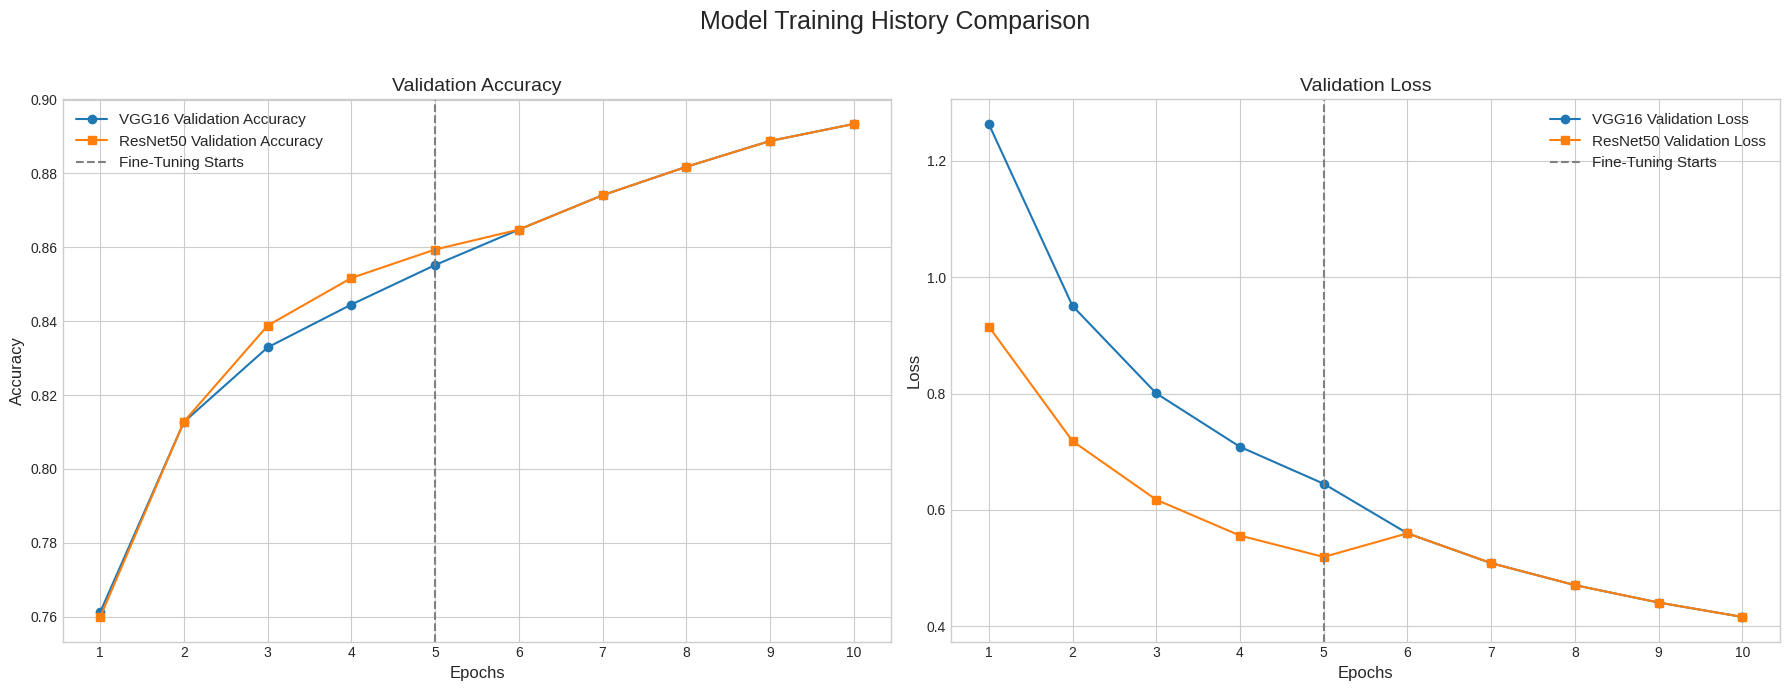

In [15]:
# -------------------------------------
## 5. FINAL COMPARISON (PLOTS)
# -------------------------------------
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Model Training History Comparison', fontsize=18)

# Combine histories for continuous plots
vgg_acc = history_ft_vgg.history['val_accuracy'] + history_fine_tune_vgg.history['val_accuracy']
vgg_loss = history_ft_vgg.history['val_loss'] + history_fine_tune_vgg.history['val_loss']
resnet_acc = history_ft_resnet.history['val_accuracy'] + history_fine_tune_vgg.history['val_accuracy']
resnet_loss = history_ft_resnet.history['val_loss'] + history_fine_tune_vgg.history['val_loss']
total_epochs = FT_EPOCHS + FINE_TUNE_EPOCHS
epoch_range = range(1, total_epochs + 1)

# Accuracy Plot
ax1.plot(epoch_range, vgg_acc, 'o-', label='VGG16 Validation Accuracy', color='C0')
ax1.plot(epoch_range, resnet_acc, 's-', label='ResNet50 Validation Accuracy', color='C1')
ax1.axvline(x=FT_EPOCHS, color='grey', linestyle='--', label='Fine-Tuning Starts')
ax1.set_title('Validation Accuracy', fontsize=14)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(fontsize=11)
ax1.set_xticks(epoch_range)
ax1.grid(True)

# Loss Plot
ax2.plot(epoch_range, vgg_loss, 'o-', label='VGG16 Validation Loss', color='C0')
ax2.plot(epoch_range, resnet_loss, 's-', label='ResNet50 Validation Loss', color='C1')
ax2.axvline(x=FT_EPOCHS, color='grey', linestyle='--', label='Fine-Tuning Starts')
ax2.set_title('Validation Loss', fontsize=14)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(fontsize=11)
ax2.set_xticks(epoch_range)
ax2.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
